In [1]:
import os
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [3]:
adatas = [x for x in os.listdir() if x.endswith('.h5ad')]
adatas

['GSE200997.h5ad']

In [4]:
def load_it(adata):
    adata = sc.read_h5ad( adata)
    return adata

In [5]:
adatas = [load_it(ad) for ad in adatas]

In [18]:
adatas

[AnnData object with n_obs × n_vars = 49859 × 23828
     obs: 'samples', 'condition', 'location', 'msi_status', 'bulk_prediction', 'prediction', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'
     var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts']

In [6]:
def qc(adata):
    

    sc.pp.filter_cells(adata, min_genes = 200)
    
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
    adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True)

    remove = ['total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo', 
          'log1p_total_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb']
    
    adata.obs = adata.obs[[x for x in adata.obs.columns if x not in remove]]
    
    return adata

In [7]:
adatas = [qc(ad) for ad in adatas]

In [8]:
df = pd.concat([x.obs for x in adatas])
df 

,samples,condition,location,msi_status,bulk_prediction,prediction,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb
B_cac10_AAACCTGAGTCAATAG,B_cac10,Normal,Left,MSS,NaN,NaN,297,297,5.697093,557.0,6.324359,36.983842,17.414722,23.159784,0.0
B_cac10_AAACCTGCACAGCCCA,B_cac10,Normal,Left,MSS,NaN,NaN,492,492,6.200509,1318.0,7.184629,33.990895,11.911987,40.515934,0.0
B_cac10_AAACCTGCACTTCGAA,B_cac10,Normal,Left,MSS,NaN,NaN,626,626,6.440947,1817.0,7.505492,26.637314,2.146395,40.286186,0.0
B_cac10_AAACCTGGTAATTGGA,B_cac10,Normal,Left,MSS,NaN,NaN,741,741,6.609349,2041.0,7.621685,24.595786,4.899559,40.764332,0.0
B_cac10_AAACCTGGTACGAAAT,B_cac10,Normal,Left,MSS,NaN,NaN,630,630,6.447306,2217.0,7.704361,29.048263,6.630582,50.338291,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_cac9_TTTGGTTCAACACGCC,T_cac9,Tumor,Left,MSS,CMS2,CMS4,1355,1355,7.212294,3463.0,8.150179,19.318510,4.244874,24.631823,0.0
T_cac9_TTTGGTTCATAGACTC,T_cac9,Tumor,Left,MSS,CMS2,CMS4,2220,2220,7.705713,7173.0,8.878219,19.001812,3.987174,27.798689,0.0
T_cac9_TTTGGTTCATCTATGG,T_cac9,Tumor,Left,MSS,CMS2,CMS1,1303,1303,7.173192,3283.0,8.096817,27.231191,8.010965,23.484617,0.0
T_cac9_TTTGGTTTCAATCTCT,T_cac9,Tumor,Left,MSS,CMS2,CMS1,595,595,6.390241,995.0,6.903747,26.532663,10.753769,3.316583,0.0


In [9]:
df = df.sort_values('samples')
df

,samples,condition,location,msi_status,bulk_prediction,prediction,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb
B_cac4_GGTGTTAAGCTATGCT,B_cac4,Normal,Left,MSS,NaN,NaN,1176,1176,7.070724,2966.0,7.995306,23.196224,7.788267,27.545515,0.000000
B_cac4_GCATACACATCGATTG,B_cac4,Normal,Left,MSS,NaN,NaN,1318,1318,7.184629,3943.0,8.279951,20.999239,4.159269,34.111084,0.000000
B_cac4_GCATACAGTGGCCCTA,B_cac4,Normal,Left,MSS,NaN,NaN,928,928,6.834109,2248.0,7.718241,20.017794,2.846975,33.274021,0.044484
B_cac4_GCATACAGTTAAAGTG,B_cac4,Normal,Left,MSS,NaN,NaN,1129,1129,7.029973,3330.0,8.111028,23.183183,4.354354,31.411413,0.030030
B_cac4_GCATACAGTTATGCGT,B_cac4,Normal,Left,MSS,NaN,NaN,1027,1027,6.935370,2272.0,7.728856,18.617958,5.061620,26.144367,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_cac16_CGACTTCAGCGATATA,T_cac16,Tumor,Left,MSS,CMS2,CMS1,1978,1978,7.590347,6057.0,8.709135,19.514611,5.002477,25.045401,0.000000
T_cac16_CGACTTCAGATGTTAG,T_cac16,Tumor,Left,MSS,CMS2,CMS1,2844,2844,7.953318,10686.0,9.276783,22.842972,1.272693,10.359348,0.000000
T_cac16_CGACTTCAGAGCTGCA,T_cac16,Tumor,Left,MSS,CMS2,CMS1,1432,1432,7.267525,5461.0,8.605570,24.024904,4.266618,43.966305,0.018312
T_cac16_CGAATGTGTTATCACG,T_cac16,Tumor,Left,MSS,CMS2,CMS1,980,980,6.888572,2062.0,7.631917,19.495635,6.983511,16.052376,0.000000


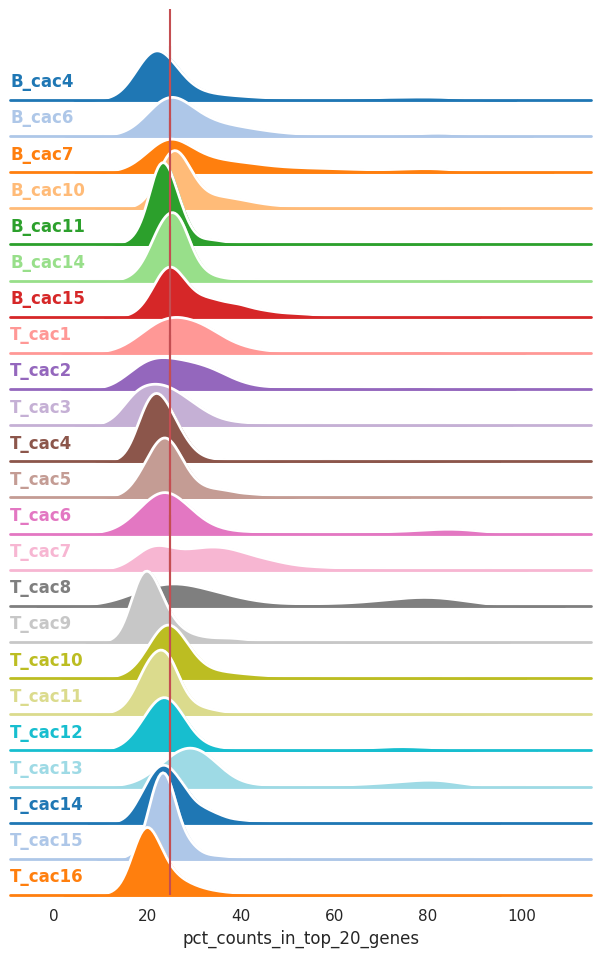

In [10]:
#value = "pct_counts_mt"
#value = "n_genes"
value = 'pct_counts_in_top_20_genes'
#value = "log1p_total_counts"

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df, row="samples", hue="samples", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df[value].median(), color='r', linestyle='-')


plt.show()

In [11]:
from scipy.stats import median_abs_deviation as mad
import numpy as np

In [12]:
a = df[df.samples == 'T_cac13'].pct_counts_in_top_20_genes
a

T_cac13_CTGTGCTAGAGTTGGC    68.730512
T_cac13_CTGGTCTTCTAACCGA    79.402030
T_cac13_CTGGTCTTCTTTCCTC    29.788484
T_cac13_CTGTGCTAGAATGTTG    24.901186
T_cac13_CTGTGCTAGCAGACTG    24.271080
                              ...    
T_cac13_TCGAGGCGTCCCTTGT    25.295950
T_cac13_TCGAGGCCACACATGT    20.944922
T_cac13_TCGAGGCGTACAGTGG    28.294036
T_cac13_TCGAGGCAGGAGTTTA    33.256217
T_cac13_TCCACACGTGTCAATC    32.483278
Name: pct_counts_in_top_20_genes, Length: 2660, dtype: float64

In [13]:
np.median(a)

30.524493519861508

In [14]:
np.median(a) - 5 * mad(a)

10.694644513888225

In [15]:
np.median(a) + 5 * mad(a)

50.354342525834795

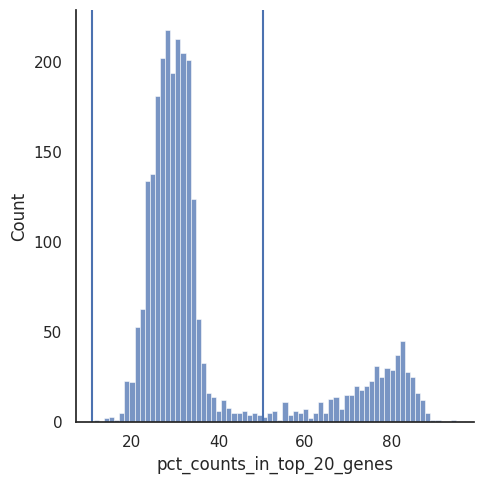

In [16]:
ax = sns.displot(a)

plt.axvline(np.median(a) - 5 * mad(a))
plt.axvline(np.median(a) + 5 * mad(a))

plt.show()

In [17]:
def mad_outlier(adata, metric, nmads, upper_only = False):
    M = adata.obs[metric]
    
    if not upper_only:
        return (M < np.median(M) - nmads * mad(M)) | (M > np.median(M) + nmads * mad(M))
    
    return (M > np.median(M) + nmads * mad(M))

In [19]:
def pp(adata):
    adata = adata[adata.obs.pct_counts_mt < 25] #you can lower this based on the overal distribution of your dataset
    
    bool_vector = mad_outlier(adata, 'log1p_total_counts', 5) +\
            mad_outlier(adata, 'log1p_n_genes_by_counts', 5) +\
            mad_outlier(adata, 'pct_counts_in_top_20_genes', 5) +\
            mad_outlier(adata, 'pct_counts_mt', 3, upper_only = True)
    adata = adata[~bool_vector]

    adata.uns['cells_removed'] = sum(bool_vector)

    

    return adata
    

In [20]:
adatas = [pp(ad) for ad in adatas]

In [21]:
for adata in adatas:
    print(len(adata), adata.uns['cells_removed'])

38228 11631


In [22]:
df2 = pd.concat([x.obs for x in adatas])
df2 = df2.sort_values('samples')
df2

,samples,condition,location,msi_status,bulk_prediction,prediction,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb
B_cac4_CGTGTAAGTCGGGTCT,B_cac4,Normal,Left,MSS,NaN,NaN,882,882,6.783325,1862.0,7.529943,18.743287,2.685285,29.215897,0.0
B_cac4_CGCTGGAGTGGCGAAT,B_cac4,Normal,Left,MSS,NaN,NaN,1217,1217,7.104965,3381.0,8.126223,22.419403,6.299911,33.333336,0.0
B_cac4_CGCTGGACAGGATCGA,B_cac4,Normal,Left,MSS,NaN,NaN,1638,1638,7.401842,4501.0,8.412277,19.795601,3.332593,24.594536,0.0
B_cac4_CGCTGGACACTTCTGC,B_cac4,Normal,Left,MSS,NaN,NaN,1041,1041,6.948897,2092.0,7.646354,20.411090,5.305927,17.877630,0.0
B_cac4_CGCTGGACAAAGGTGC,B_cac4,Normal,Left,MSS,NaN,NaN,870,870,6.769642,2188.0,7.691200,21.800731,5.118830,33.957951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_cac16_CCGTTCAAGTCTCCTC,T_cac16,Tumor,Left,MSS,CMS2,CMS1,2466,2466,7.810758,9062.0,9.111956,19.234165,2.030457,26.208342,0.0
T_cac16_CCGTGGATCCGCAGTG,T_cac16,Tumor,Left,MSS,CMS2,CMS4,1387,1387,7.235619,3316.0,8.106816,18.968637,5.247286,23.190590,0.0
T_cac16_CCGTGGACAGCTGGCT,T_cac16,Tumor,Left,MSS,CMS2,CMS2,695,695,6.545350,1071.0,6.977282,25.210084,9.430439,6.722690,0.0
T_cac16_CGATGGCTCTCGGACG,T_cac16,Tumor,Left,MSS,CMS2,CMS1,2940,2940,7.986505,10144.0,9.224736,18.750000,4.209385,21.490536,0.0


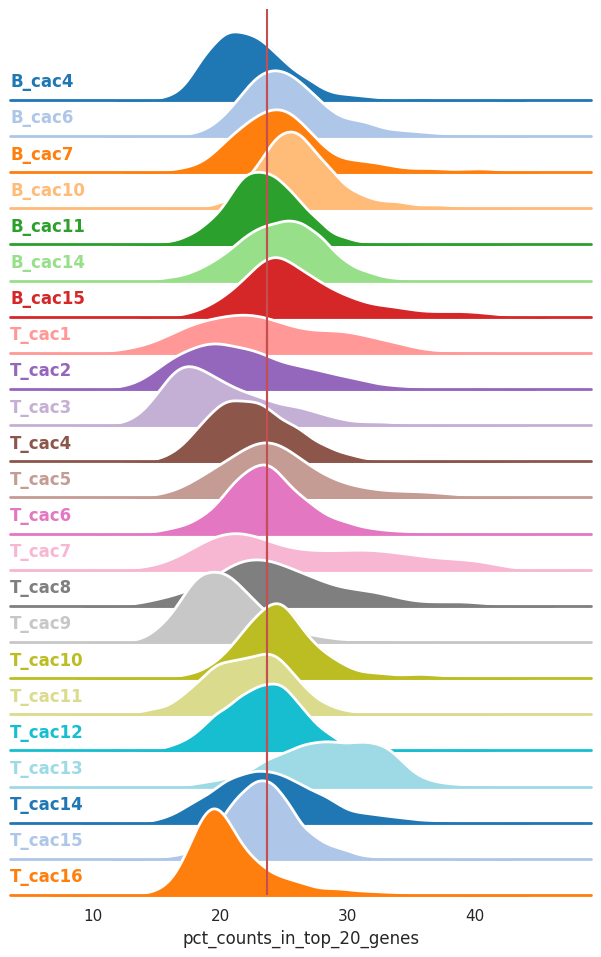

In [23]:
#value = "pct_counts_mt"
#value = "n_genes"
value = 'pct_counts_in_top_20_genes'
#value = "log1p_total_counts"

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df2, row="samples", hue="samples", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df2[value].median(), color='r', linestyle='-')


plt.show()

In [25]:
output_dir = 'modified_data'
filename= 'GSE200997.h5ad'
#os.makedirs(output_dir, exist_ok=True)

In [ ]:
adatas

In [ ]:
original_files = ['GSM5688711.h5ad', 'GSM5688710.h5ad', 'GSM5688707.h5ad', 
                  'GSM5688709.h5ad', 'GSM5688708.h5ad', 'GSM5688706.h5ad']


In [ ]:
for adata, filename in zip(adatas, original_files):
    output_path = os.path.join(output_dir, filename)
    adata.write_h5ad(output_path)

In [26]:
output_path = os.path.join(output_dir, filename)
output_path

'modified_data/GSE200997.h5ad'

In [27]:
adata.write_h5ad(output_path)